In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.width', 100)
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings("ignore")

# Genel Bakış

Bu kısımda veri seti üzerinde genel bir fikir kazanmak adına inceleme yapıldı:
- Veri setinin ilk 10 satırı yazdırıldı.
- Veri setinin kolonlarının isimleri yazdırıldı.
- Kolonların veri tipleri ve içerisindeki dolu veri sayısı yazdırıldı.

In [2]:
# verinin okunması 
data = pd.read_csv("train.csv")
df = data.copy()

In [3]:
#verinin ilk 10 satırını gösterir
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Kolonları inceleme aşamasında içerisinde nümerik değerler bulunan bazı değişkenlerin aslında kategorik tipte değişken olduğu fark edildi ve tip dönüşümü gerçekleştirildi.

In [5]:
# sayısal veri içerdikleri için numerik gözüken değişkenlerin tipini kategorik tipine (object) çevrilmesi : 

df.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

# Imputation

Bu aşamada genel olarak veri seti üzerindeki eksik ve hatalı verilerin temizlenmesi ve düzeltilmesi üzerine çalışıldı.

In [6]:
## ikinci bölümde yapsak daha iyi olacağını düşünüyorum ?

# for col in df.columns :
#     if df[col].dtype == 'object' :
#         df[col] = df[col].astype('category')

- Öncelikle excel tablosunun "**expectation**" kolonundaki nümerik verilerin değerlendirilmesini yapmak için korelasyon değerlerine bakıldı.

<AxesSubplot:>

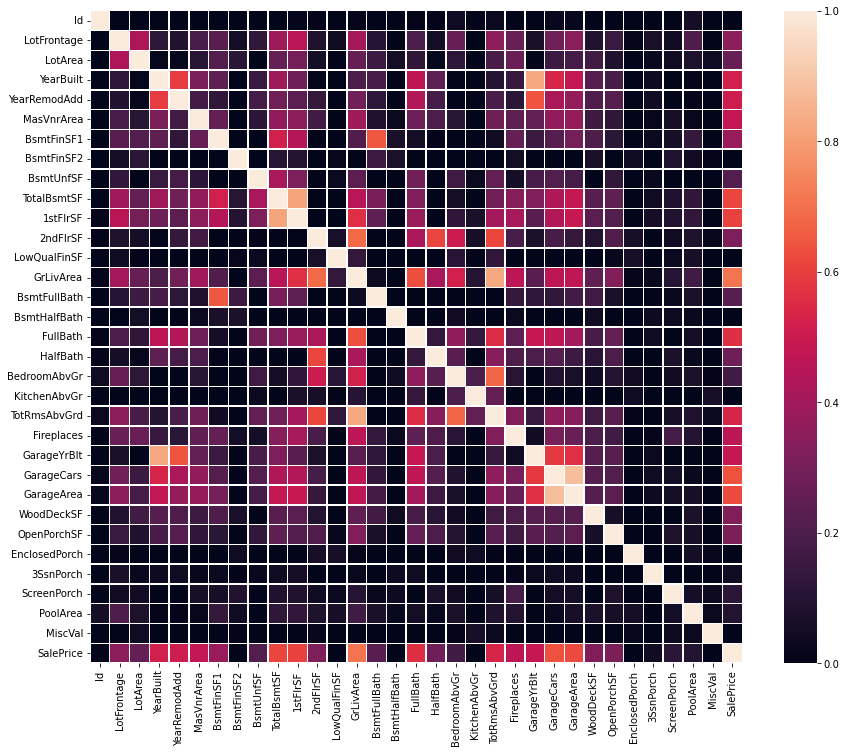

In [7]:
# numerik değişkenler arasındaki korelasyonlara hızlı bir bakış : 

corr = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr,linewidths=.5, vmin=0, vmax=1, square=True)

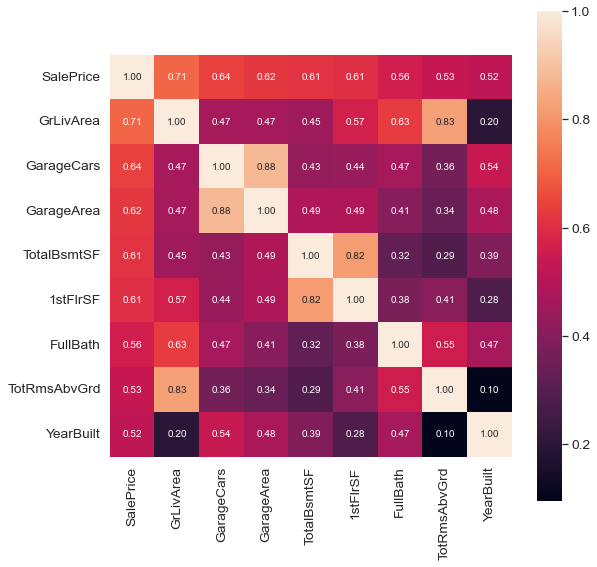

In [8]:
# saleprice korelasyon matrisi:

k = 9 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(9,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Null Verilerin Tespit Edilmesi ve Temizlenmesi

Öncelikle null veriler tespit edilerek toplam sayıları ve bu sayılara oranla yüzdeleri yazdırıldı.

In [9]:
# yüzdesel olarak eksik verilerin kontrolü: 

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Bu bilgiler ışığında:
- PoolQC, MiscFeature, Alley, Fence ve FireplaceQu adlı kolonların null değerleri çok yüksek çıkmıştır.
- Örnek olarak PoolQC adlı kolon incelendiğinde toplamda 1460 değerin sadece 7 tanesi doludur. Geri kalan 1453 değer null veridir.

In [10]:
df["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

- Sonrasında yüzdesel olarak fazlaca eksik değere sahip olduğu için ve SalePrice kolonunu çok fazla etkilemeyeceği düşünüldüğü için veri setinden çıkarılmasına karar verilmiştir.
- Id kolonu da veri setinde bir anlam ifade etmediği için atıldı.

In [11]:
# veri setinden çıkarılacak değişkenlerin çıkarılması: 

df=df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)

In [12]:
# numerik ve kategorik olan kolonları ayrı değişkenlere atanması:
#MERVE BUNU SİL
num_col=df._get_numeric_data().columns.tolist()
cat_col=set(df.columns)-set(num_col)

Belirtilen kolonlar silindikten sonra kalan null veriler tekrar yazdırıldı.

In [13]:
# incelememiz gereken diğer değişkenleri görmek için tekrar eksik veri tablosunun gösterimi:

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
LotFrontage,259,0.177397
GarageFinish,81,0.055479
GarageType,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageYrBlt,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342


### Null verilerin doldurulması

Belirlediğimiz yüzdelik dilimin altında kalan kolonların null değerleri anlamlı verilerle dolduruldu.

LotFrontage kolonu evin sokağa bağlanma uzaklığını ifade etmektedir. Bu kolon üzerinde yapılan işlemler sonucu null değerlerin medyanla doldurulmasına karar verildi.

In [14]:
# lot frontage

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

# Grouping Operations

Bu kısımda kolonları birleştirme işlemleri yapıldı.

Banyo sayılarıyla ilgili kolonlarda birleştirme işlemi yapıldı:
- FullBath; tam-banyo sayısını, HalfBath; yarım-banyo sayısını ifade etmektedir.
- BsmtFullBath; bodrumdaki tam-banyo sayısını, ve BsmtHalfBath; bodrumdaki yarım-banyo sayısını ifade etmektedir.
- TotalBath hesaplanırken FullBath için 1 katsayısı, HalfBath için 0.5 katsayısı kullanılarak hesaplanmıştır. Bu kolon toplam banyo sayısını ifade etmektedir.

In [15]:
# TotalBath kolonunun hesaplanması ve ilgili kolonların çıkarılması 

df['TotalBath'] = df['FullBath'] + (0.5*df['HalfBath']) + df['BsmtFullBath'] + (0.5*df['BsmtHalfBath'])
df = df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis = 1)

Veranda tipleri tek başlarına korelasyonları çok düşük olduğu için ve 0 sayısı çok fazla olduğu için TotalPorch adlı bir kolonda toplandı ve geri kalan kolonlar silindi.

In [16]:
## TotalPorch kolonunun oluşturulması ve diğer ilgili kolonların silinmesi.

df["TotalPorch"] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df = df.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], axis = 1)

- Condition kolonları evin demiryollarına, park ve bahçeleri vs. yakınlığını göstermektedir. 
- Condition1 ve Condition2 kolonları çok sayıda aynı özelliği taşımaktadır.

In [17]:
#Condition kolonlarının düzenlenmesi:

df[["Condition1","Condition2", "SalePrice"]]

,Condition1,Condition2,SalePrice
0,Norm,Norm,208500
1,Feedr,Norm,181500
2,Norm,Norm,223500
3,Norm,Norm,140000
4,Norm,Norm,250000
...,...,...,...
1455,Norm,Norm,175000
1456,Norm,Norm,210000
1457,Norm,Norm,266500
1458,Norm,Norm,142125


- Condition2'de sadece 15 veri farklılık göstermektedir. Bu yüzden Condition2 kolonu atılarak sadece Conditon1 kolonu tutulacaktır.

In [18]:
# condition1

df["Condition1"].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [19]:
# condition2

df["Condition2"].value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [20]:
# condition2 değişkeni çıkarıldı, condition1 değişkeninin adı "condition" olarak değiştirildi:

df.drop("Condition2", axis=1, inplace=True)
df.rename(columns={"Condition1": "Condition"}, inplace=True)


df['GarageCond']
GarageX ile ilgili açıklamalar yapılacak ve tekrar gözden geçirilmesi gerek

In [21]:
# garageX
# bu değişkenler arasından çıkarmayalım dedikleriniz olursa konuşalım.
df = df.drop(['GarageArea','GarageYrBlt','GarageCond','GarageFinish'], axis = 1)

df['GarageType'].fillna('NA', inplace=True)
df['GarageQual'].fillna('NA', inplace=True)

- BsmtQual, BsmtExposure ve BsmtCond kolonları diğer basement kolonlarını kapsadığından seçilmiş kolonlar kaldırıldı.
- Bu üç kapsayıcı kolonun NaN değerleri "NA"(No basement) değeri ile dolduruldu

In [22]:
# basementX
df = df.drop(['BsmtFinSF2','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','BsmtFinType2','BsmtFinType1'], axis = 1)

df['BsmtExposure'].fillna('NA', inplace=True)
df['BsmtCond'].fillna('NA', inplace=True)
df['BsmtQual'].fillna('NA', inplace=True)

## bu kolonlarıda çıkardım? 
# df['BsmtFinType2'].fillna('NA', inplace=True)
# df['BsmtFinType1'].fillna('NA', inplace=True)

In [23]:
# masvnr
# bu değişken için farklı bir şey yapılacak. 

# df["MasVnrType"].fillna('NA', inplace=True)
# df["MasVnrType"].replace('None', 'NA',inplace=True)

Electrical kolonundaki tek null değer çıkartıldı.

In [24]:
# electrical :

df = df.drop(df.loc[df['Electrical'].isnull()].index)

1stFlrSF ve 2ndFlrSF değişkenlerinin toplamı GrLivArea değişkenini verdiği için bu iki değişken veri setinden çıkarıldı

In [25]:
#1. kat alanı ve 2. kat alanı GrLivArea'yı verdiği için iki kolon da silindi.
df.drop(["1stFlrSF","2ndFlrSF"], axis=1, inplace=True)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Alan bilgisi içeren kolonlardan 0 sayısı yüksek olanlar belirtildi.
- Bunun belirtilmesinin sebebi alan değeri 0 olduğunda o evin bu özelliğe sahip olmadığı bilgisine ulaşılırken, NaN olduğunda evin bu özelliğe sahip olup olmadığı bilinmemektedir.

In [26]:
zeroSpaces = df[["LowQualFinSF", "PoolArea", "WoodDeckSF", "MiscVal", "MasVnrArea", "SalePrice"]]
zeroSpaces

,LowQualFinSF,PoolArea,WoodDeckSF,MiscVal,MasVnrArea,SalePrice
0,0,0,0,0,196.0,208500
1,0,0,298,0,0.0,181500
2,0,0,0,0,162.0,223500
3,0,0,0,0,0.0,140000
4,0,0,192,0,350.0,250000
...,...,...,...,...,...,...
1455,0,0,0,0,0.0,175000
1456,0,0,349,0,119.0,210000
1457,0,0,0,2500,0.0,266500
1458,0,0,366,0,0.0,142125


Toplam 10 tane bol sıfırlı alan kolonu var, sadece bunların yüzdelerine bakıcak olursak:

In [27]:
# kolonlardaki 0'ların yüzdesel olarak gösterimi: 

total = (df == 0).sum(axis=0).sort_values(ascending=False)
percent = ((df == 0).sum(axis=0)/df.count()).sort_values(ascending=False)
zeros = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
zeros.head(8)

,Total,Percent
PoolArea,1452,0.995202
LowQualFinSF,1433,0.982180
MiscVal,1407,0.964359
MasVnrArea,860,0.592695
WoodDeckSF,761,0.521590
Fireplaces,689,0.472241
TotalPorch,457,0.313228
GarageCars,81,0.055517


Buradaki 0 değerleri yüksek kolonlar çıkartıldı.

In [28]:
df = df.drop(['PoolArea','LowQualFinSF','MiscVal'], axis = 1)

In [29]:
# veri setinin son hali : 

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,PavedDrive,WoodDeckSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath,TotalPorch
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,Y,0,2,2008,WD,Normal,208500,3.5,61
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,Y,298,5,2007,WD,Normal,181500,2.5,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,Y,0,9,2008,WD,Normal,223500,3.5,42
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,Y,0,2,2006,WD,Abnorml,140000,2.0,307
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,Y,192,12,2008,WD,Normal,250000,3.5,84


Verileri temizledikten sonraki korelasyonları:

<AxesSubplot:>

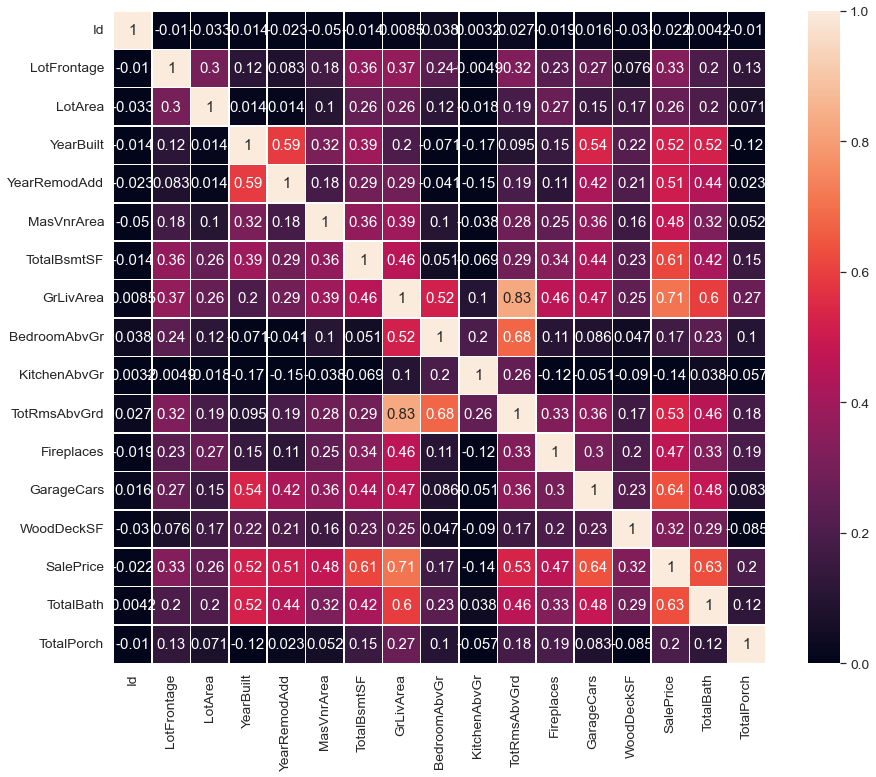

In [30]:
# numerik değişkenler arasındaki korelasyonlara hızlı bir bakış : 

corr = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr,linewidths=.5, vmin=0, vmax=1, square=True, annot=True)

# Handling Outliers

Öncelikle temizleme işlemlerinden sonra nümerik verilerin korelasyonlarına bakıldı.

In [31]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
GrLivArea       0.708618
GarageCars      0.640473
TotalBath       0.631809
TotalBsmtSF     0.613905
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
YearRemodAdd    0.507430
MasVnrArea      0.477486
Fireplaces      0.466968
LotFrontage     0.334793
WoodDeckSF      0.324422
LotArea         0.263837
TotalPorch      0.195691
BedroomAbvGr    0.168235
Id             -0.021756
KitchenAbvGr   -0.135935
Name: SalePrice, dtype: float64

Korelasyon değeri rastgele 6 kolon seçildi ve görselleştirmeden faydalanarak outlier veriler incelendi.

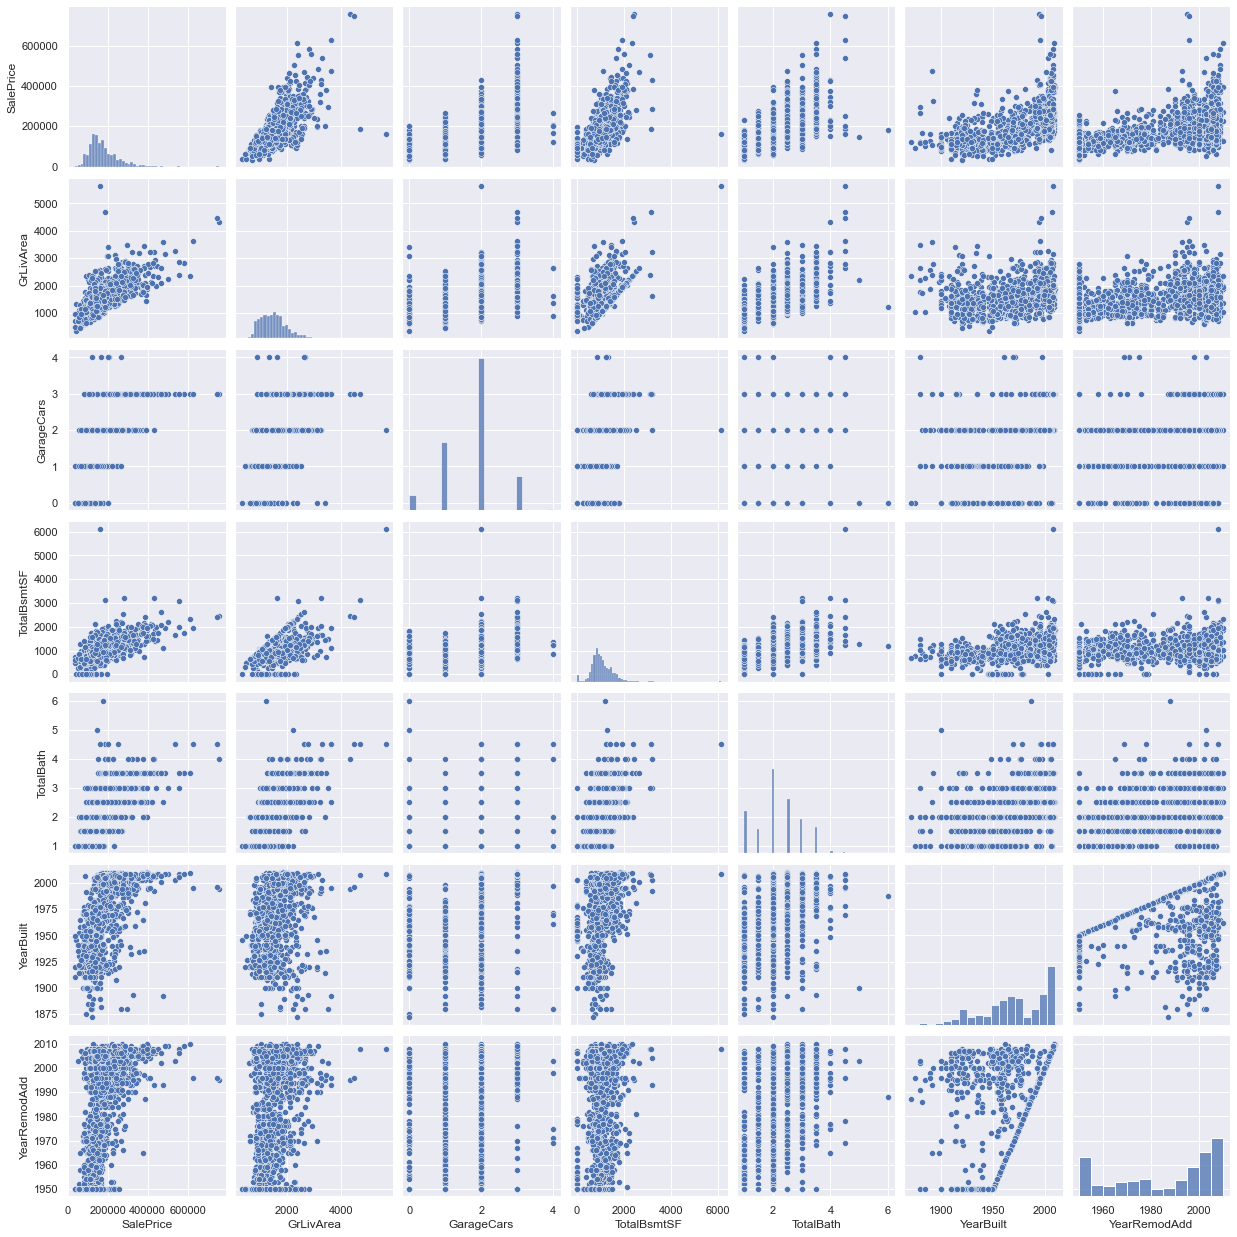

In [32]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'TotalBath', 'YearBuilt','YearRemodAdd']
sns.pairplot(df[cols], size = 2.5)
plt.show();

Buradan sonra bu kolonların 4 tanesinin outlierları temizlenecektir. Outlier temizleme işlemi için IQR seçilmiştir.

Seçilen kolonların IQR hesaplamasından önceki görsellerine yakın bakış:

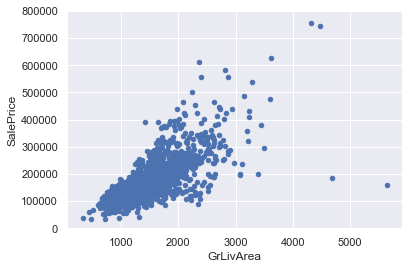

In [33]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

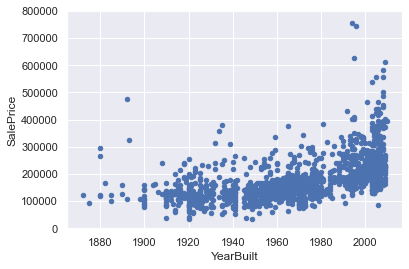

In [34]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

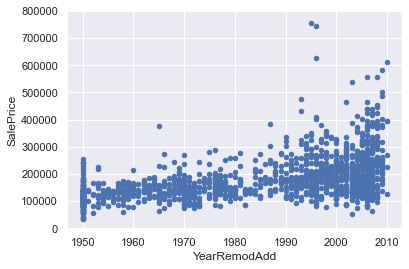

In [35]:
var = 'YearRemodAdd'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

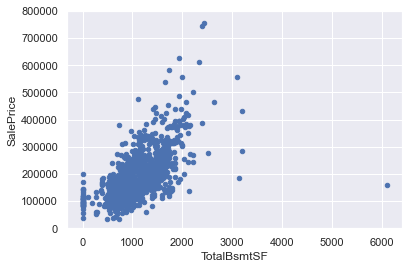

In [36]:
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [37]:
#GrLivArea quantile hesaplama
grlivarea_q1 = df["GrLivArea"].quantile(0.25)
grlivarea_q3 = df["GrLivArea"].quantile(0.75)

#GrLivArea quantile hesaplama
year_q1 = df["YearBuilt"].quantile(0.25)
year_q3 = df["YearBuilt"].quantile(0.75)

#GrLivArea quantile hesaplama
total_bsmt_q1 = df["TotalBsmtSF"].quantile(0.25)
total_bsmt_q3 = df["TotalBsmtSF"].quantile(0.75)

#GrLivArea quantile hesaplama
yearremod_q1 = df["YearRemodAdd"].quantile(0.25)
yearremod_q3 = df["YearRemodAdd"].quantile(0.75)

In [38]:
#Buradaki fonksiyonlarda sırasıyla iqr hesaplama, outlier aralığı hesaplama ve dataframeden outlier temizliği yapılmaktadır.

#Hesaplanan q3 ve q1 değerlerinin farkı alınarak IQR değerlerini hesaplayan ve bu değerleri yazdıran fonksiyon.
def iqr_calculation(q3, q1):
    iqr = q3 - q1
    print(f"Q1 değeri: {q1} ve Q3 değeri: {q3}")
    print(f"IQR değeri: {iqr}")
    return iqr

#HEsaplanan IQR değerleri sonrasında outlierları bulabilmek için 1.5*IQR yöntemi uygulayan fonksiyon.
def outlier_calculation(q3, q1, iqr):
    lower_outlier = q1 - (1.5 * iqr)
    higher_outlier = q3 + (1.5 * iqr)
    print(f"{lower_outlier} değerinden küçük ve {higher_outlier} değerinden büyük bütün değerler outlierdır.\n")
    return lower_outlier, higher_outlier

#Belirtilen kolondaki verilerin değeri, outlier sınırı olarak belirlenen değerlerden büyük veya küçükse değerleri silen fonksiyon.
def outlier_cleaning(n, lower_outlier, higher_outlier):
    df.drop(df.loc[df[n] < lower_outlier].index, inplace=True)
    df.drop(df.loc[df[n] > higher_outlier].index, inplace=True) 

In [39]:
print("GrLivArea için:")
grlivarea_iqr = iqr_calculation(grlivarea_q3, grlivarea_q1)
grlivarea_lower_outlier, grlivarea_higher_outlier = outlier_calculation(grlivarea_q3, grlivarea_q1, grlivarea_iqr)
outlier_cleaning("GrLivArea", grlivarea_lower_outlier, grlivarea_higher_outlier)

print("YearBuilt için:")
year_iqr = iqr_calculation(year_q3, year_q1)
year_lower_outlier, year_higher_outlier = outlier_calculation(year_q3, year_q1, year_iqr)
outlier_cleaning("YearBuilt", year_lower_outlier, year_higher_outlier)

print("TotalBsmtSF için:")
total_bsmt_iqr = iqr_calculation(total_bsmt_q3, total_bsmt_q1)
total_bsmt_lower_outlier, total_bsmt_higher_outlier = outlier_calculation(total_bsmt_q3, total_bsmt_q1, total_bsmt_iqr)
outlier_cleaning("TotalBsmtSF", total_bsmt_lower_outlier, total_bsmt_higher_outlier)

print("YearRemodAdd için:")
yearremod_iqr = iqr_calculation(yearremod_q3, yearremod_q1)
yearremod_lower_outlier, yearremod_higher_outlier = outlier_calculation(yearremod_q3, yearremod_q1, yearremod_iqr)
outlier_cleaning("YearRemodAdd", yearremod_lower_outlier, yearremod_higher_outlier)

GrLivArea için:
Q1 değeri: 1129.0 ve Q3 değeri: 1777.5
IQR değeri: 648.5
156.25 değerinden küçük ve 2750.25 değerinden büyük bütün değerler outlierdır.

YearBuilt için:
Q1 değeri: 1954.0 ve Q3 değeri: 2000.0
IQR değeri: 46.0
1885.0 değerinden küçük ve 2069.0 değerinden büyük bütün değerler outlierdır.

TotalBsmtSF için:
Q1 değeri: 796.0 ve Q3 değeri: 1298.5
IQR değeri: 502.5
42.25 değerinden küçük ve 2052.25 değerinden büyük bütün değerler outlierdır.

YearRemodAdd için:
Q1 değeri: 1967.0 ve Q3 değeri: 2004.0
IQR değeri: 37.0
1911.5 değerinden küçük ve 2059.5 değerinden büyük bütün değerler outlierdır.



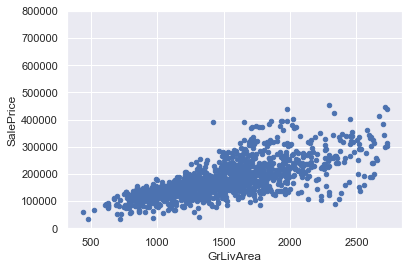

In [40]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

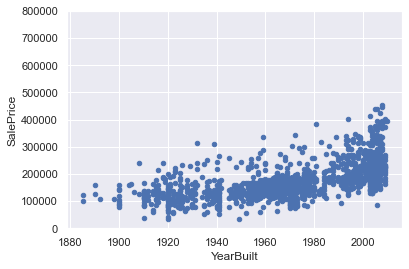

In [41]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

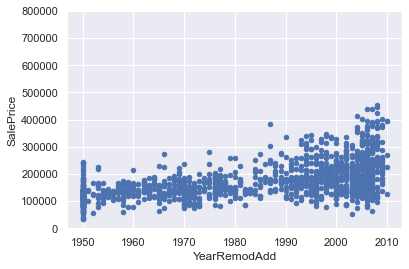

In [43]:
var = 'YearRemodAdd'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

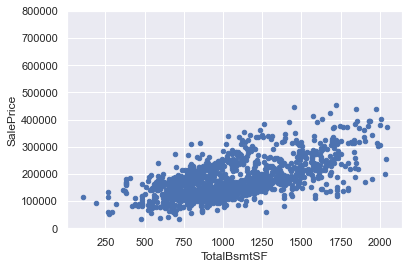

In [42]:
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));